In [285]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import math
import sklearn

#test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train_copy = train
train_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [286]:
# To save time, only did ones I ended up needing later on. 

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

train.Neighborhood= le.fit_transform(train.Neighborhood)
train.Condition1= le.fit_transform(train.Condition1)
train.Condition2= le.fit_transform(train.Condition2)
train.Functional= le.fit_transform(train.Functional)

train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [287]:
from sklearn.model_selection import train_test_split

X = train_copy.drop('SalePrice',axis = 1)
y = train.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

# For experiment 1, I will use 'neighborhood', 'condition1', 'condition2', 'GrLivArea', 'OverallCond', 'YearBuilt'(use to find age by adding (year of data set and subtract year bult from it),'Functional'. I started with these as the looked to be the most important factors in housing prices when they are being estimated by realtors. Thus, I thought these factors may create a good first test with just the believed basics in home price influence. 





source: https://www.opendoor.com/w/blog/factors-that-influence-home-value
        https://www.investopedia.com/articles/mortgages-real-estate/08/housing-appreciation.asp

In [288]:
X1_train = X_train[['Neighborhood', 'Condition1', 'Condition2', 'GrLivArea', 'OverallCond', 'YearBuilt',
                  'Functional','LotArea']]
X1_test = X_test[['Neighborhood', 'Condition1', 'Condition2', 'GrLivArea', 'OverallCond', 'YearBuilt',
                  'Functional','LotArea']]
y1_train = y_train

y1_test = y_test

# Create our linear regression model

In [289]:
from sklearn.linear_model import LinearRegression

linearmodel1 = LinearRegression().fit(X1_train,y1_train)

# See what our coefficient of determination is to determine how well our model performed

In [290]:
coeff = linearmodel.score(X1_train, y1_train)
print('Coefficient of Determination for Experiment 1:', coeff)

Coefficient of Determination for Experiment 1: 0.6797619029419183


# We want values close to one, but anything above .70 is considered good. For this first experiment I will continue as is with the exp_1 model as I got a coefficient of .68 is pretty close to .70. Now I can start my predictions. 

In [292]:
y1_pred = linearmodel.predict(X1_test)

# Create a chart to  look at model

In [271]:


# Evaluate model 

In [293]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y1_test,y1_pred,squared = False)
rmse

45420.62724425369

# Now for our second test

<AxesSubplot:>

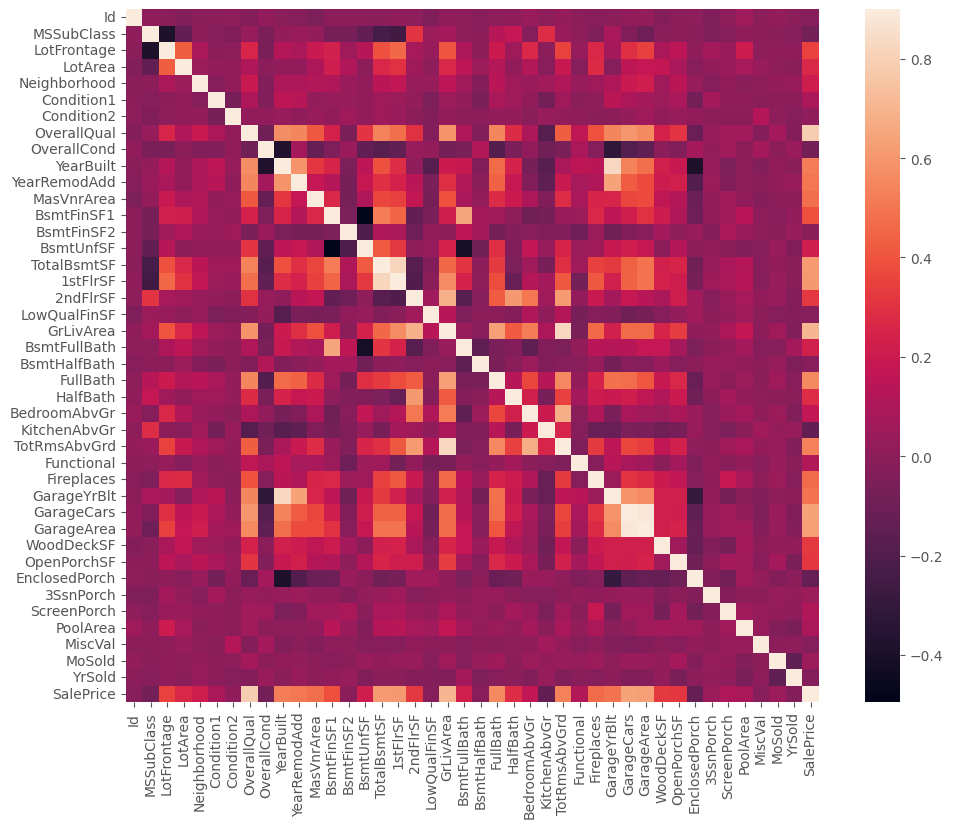

In [294]:
plt.subplots(figsize=(12,9))
sns.heatmap(train.corr(), vmax=0.9, square=True)

# From here, I can see what has a correlation with sale price. I will use features that are 60% or higher in this test. 

In [297]:
X2_train = X_train[['OverallQual','GrLivArea','GarageCars','GarageArea','FullBath','TotalBsmtSF',
                '1stFlrSF','YearBuilt','YearRemodAdd','TotRmsAbvGrd']]
X2_test = X_test[['OverallQual','GrLivArea','GarageCars','GarageArea','FullBath','TotalBsmtSF',
                '1stFlrSF','YearBuilt','YearRemodAdd','TotRmsAbvGrd']]
y2_train = y_train

y2_test = y_test

In [298]:
from sklearn.linear_model import LinearRegression

linearmodel2 = LinearRegression().fit(X2_train,y2_train)

In [299]:
coeff = linearmodel2.score(X2_train, y2_train)
print('Coefficient of Determination for Experiment 2:', coeff)

Coefficient of Determination for Experiment 2: 0.7562355511204404


In [300]:
y2_pred = linearmodel2.predict(X2_test)

In [301]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y2_test,y2_pred,squared = False)
rmse

37253.02176761056

# Now for experiment 3 

In [ ]:
from sklearn.svm import SVR

exp_3 = SVR(kernel='linear')
y3_pred = lin.fit(X2_train, y2_train).predict(X2_test)



In [311]:
exp3_coeff = exp_3.coef_

AttributeError: 'SVR' object has no attribute '_dual_coef_'

In [308]:
rmse= mean_squared_error(y2_test,y3_pred,squared = False)
rmse

84603.57285221873

37250.64134732523

39836.283224517334

from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
sc_y_test = StandardScaler()
sc_X_test = StandardScaler()
sc_y_train = StandardScaler()
X3_test = sc_X_train.fit_transform(X2_test)
y3_test = sc_y_test.fit_transform(y2_test)
X3_train = sc_X_train.fit_transform(X2_train)
y3_train = sc_y_test.fit_transform(y2_train)